In [4]:
import numpy as np
from pytestlab.instruments import AutoInstrument
import time

psu = AutoInstrument.from_config("keysight/EDU36311A")
dmm = AutoInstrument.from_config("keysight/EDU34450A")


Exception: Failed to acquire mutex lock

In [3]:

# Define the voltage sweep parameters
start_voltage = 2.0  # Volts
stop_voltage = 3.0  # Volts
voltage_step = 0.1  # Volts
voltages = np.arange(start_voltage, stop_voltage + voltage_step, voltage_step)


Error initializing instruments: name 'AutoInstrument' is not defined
Error during DC analysis: name 'psu' is not defined


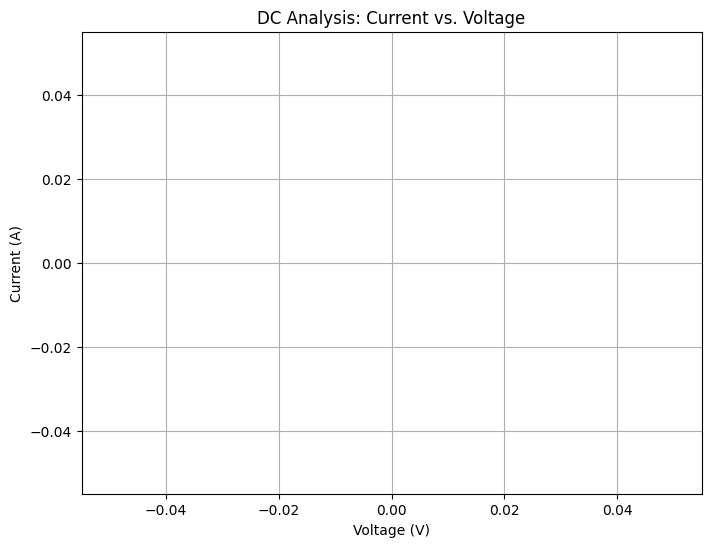

: 

In [ ]:

# Instantiate the instruments
try:
    psu = AutoInstrument.from_config("keysight/EDU36311A")
    dmm = AutoInstrument.from_config("keysight/EDU34450A")
except Exception as e:
    print(f"Error initializing instruments: {e}")
    exit()

# Channel to use for the power supply
psu_channel = 1

# Initialize lists to store data
measured_voltages = []
measured_currents = []

try:
    # Configure the power supply
    psu.set_voltage(psu_channel, start_voltage)  # Set initial voltage
    psu.set_current(psu_channel, 0.1)  # Set a current limit (adjust as needed)
    psu.output(psu_channel, True)  # Enable the output

    # Perform the DC analysis sweep
    for voltage in voltages:
        psu.set_voltage(psu_channel, voltage)
        time.sleep(0.1)  # Allow the voltage to stabilize

        # Measure the voltage and current using the multimeter
        measured_voltage = dmm.measure(measurement_type="VOLTAGE", mode="DC")
        measured_current = dmm.measure(measurement_type="CURRENT", mode="DC")

        measured_voltages.append(measured_voltage.values)
        measured_currents.append(measured_current.values)

        print(f"Set Voltage: {voltage:.2f} V, Measured Voltage: {measured_voltage.values:.4f} V, Measured Current: {measured_current.values:.4f} A")

except Exception as e:
    print(f"Error during DC analysis: {e}")

finally:
    # Clean up
    if 'psu' in locals():
        psu.output(psu_channel, False)  # Disable the power supply output
        psu.close()
    if 'dmm' in locals():
        dmm.close()

# Optional: You can plot the results using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(measured_voltages, measured_currents, marker='o')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.title("DC Analysis: Current vs. Voltage")
plt.grid(True)
plt.show()